# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid=2937f7b4647d8e03bd6a82778fecd048&units={units}&q="
cities_api = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
i = 1
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cities_api.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing city number: {i} city name: {city}')
    except:
        print(f'{city} not found')
        pass
    i += 1

Processing city number: 1 city name: port macquarie
Processing city number: 2 city name: pitkyaranta
Processing city number: 3 city name: georgetown
Processing city number: 4 city name: guanaja
Processing city number: 5 city name: arlit
Processing city number: 6 city name: bambous virieux
Processing city number: 7 city name: jamestown
Processing city number: 8 city name: norman wells
Processing city number: 9 city name: tazovskiy
Processing city number: 10 city name: barrow
Processing city number: 11 city name: kahului
Processing city number: 12 city name: vardo
Processing city number: 13 city name: mao
Processing city number: 14 city name: mahajanga
Processing city number: 15 city name: dejen
Processing city number: 16 city name: kapaa
Processing city number: 17 city name: nikolskoye
Processing city number: 18 city name: ushuaia
Processing city number: 19 city name: saskylakh
sentyabrskiy not found
Processing city number: 21 city name: poitiers
Processing city number: 22 city name: va

Processing city number: 185 city name: lumeje
Processing city number: 186 city name: port keats
Processing city number: 187 city name: maine-soroa
Processing city number: 188 city name: turukhansk
Processing city number: 189 city name: iqaluit
Processing city number: 190 city name: aviles
Processing city number: 191 city name: aksarka
Processing city number: 192 city name: sovetskiy
Processing city number: 193 city name: meulaboh
Processing city number: 194 city name: yangjiang
Processing city number: 195 city name: yima
Processing city number: 196 city name: east london
Processing city number: 197 city name: umarkot
Processing city number: 198 city name: sao joao da barra
Processing city number: 199 city name: birjand
Processing city number: 200 city name: torbay
Processing city number: 201 city name: souillac
Processing city number: 202 city name: omsukchan
Processing city number: 203 city name: port lincoln
Processing city number: 204 city name: uvinza
Processing city number: 205 ci

Processing city number: 360 city name: padang
Processing city number: 361 city name: kirovsk
Processing city number: 362 city name: lensk
Processing city number: 363 city name: myitkyina
Processing city number: 364 city name: winslow
Processing city number: 365 city name: birao
Processing city number: 366 city name: kijang
Processing city number: 367 city name: vila velha
Processing city number: 368 city name: impfondo
Processing city number: 369 city name: kralendijk
Processing city number: 370 city name: trapani
Processing city number: 371 city name: ust-maya
Processing city number: 372 city name: isangel
Processing city number: 373 city name: narbonne
Processing city number: 374 city name: ardakan
Processing city number: 375 city name: saint-joseph
Processing city number: 376 city name: plymouth
Processing city number: 377 city name: gorontalo
Processing city number: 378 city name: lasa
Processing city number: 379 city name: tianpeng
Processing city number: 380 city name: oyem
Proce

Processing city number: 538 city name: gohana
turtkul not found
Processing city number: 540 city name: gheorghe doja
Processing city number: 541 city name: novyye burasy
Processing city number: 542 city name: bengkulu
Processing city number: 543 city name: matamoros
Processing city number: 544 city name: sikonge
Processing city number: 545 city name: vostok
Processing city number: 546 city name: obera
Processing city number: 547 city name: jamsa
Processing city number: 548 city name: maragogi
Processing city number: 549 city name: ixtapa
Processing city number: 550 city name: bilibino
Processing city number: 551 city name: itoigawa
Processing city number: 552 city name: basirhat
Processing city number: 553 city name: khorixas
Processing city number: 554 city name: longyan
chikoy not found
Processing city number: 556 city name: kampong thum
Processing city number: 557 city name: machhlishahr
Processing city number: 558 city name: los andes
Processing city number: 559 city name: oistins


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame({'City': cities_api, 'Lat': lat, 'Lng': lng, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country, 'Date': date})
cities_df.to_csv('output_data/cities.csv', index = False, header = True)
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Macquarie,-31.43,152.92,19.44,66,0,0.45,AU,1596346756
1,Pitkyaranta,61.57,31.48,16.21,66,78,0.75,RU,1596346756
2,George Town,5.41,100.34,31.00,74,20,2.10,MY,1596346697
3,Guanaja,16.40,-85.90,28.44,78,8,2.35,HN,1596346756
4,Arlit,18.74,7.39,30.51,48,41,1.63,NE,1596346756
...,...,...,...,...,...,...,...,...,...
569,Urubichá,-15.38,-62.95,19.59,57,1,0.12,BO,1596346917
570,Leh,34.17,77.58,19.48,27,2,2.84,IN,1596346918
571,Uberaba,-19.75,-47.93,15.58,65,7,2.55,BR,1596346918
572,Kargopol',61.51,38.95,14.14,65,16,2.73,RU,1596346919


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
cities_file = "output_data/cities.csv"
cities_file_df = pd.read_csv(cities_file)
cities_file_df
cities_file_df[cities_file_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

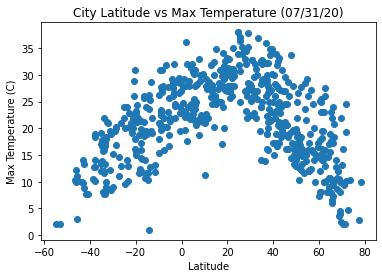

In [9]:
plt.scatter(cities_file_df['Lat'], cities_file_df['Max Temp'])
plt.title('City Latitude vs Max Temperature (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()

There is a strong correlation between Latitude and Max Temperature.

## Latitude vs. Humidity Plot

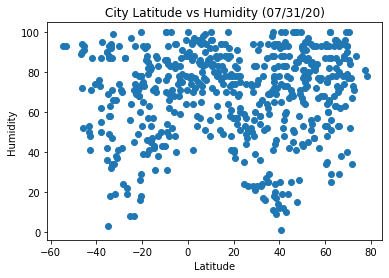

In [10]:
plt.scatter(cities_file_df['Lat'], cities_file_df['Humidity'])
plt.title('City Latitude vs Humidity (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

There is no correlation.

## Latitude vs. Cloudiness Plot

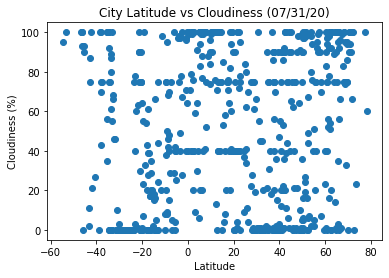

In [11]:
plt.scatter(cities_file_df['Lat'], cities_file_df['Cloudiness'])
plt.title('City Latitude vs Cloudiness (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

There is no correlation.

## Latitude vs. Wind Speed Plot

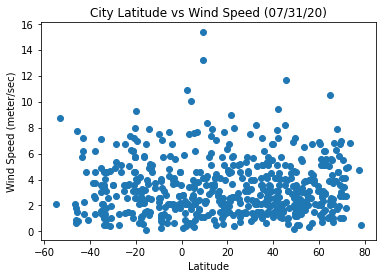

In [12]:
plt.scatter(cities_file_df['Lat'], cities_file_df['Wind Speed'])
plt.title('City Latitude vs Wind Speed (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meter/sec)')
plt.show()

There is no correlation.

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_cities_df = cities_file_df[cities_file_df['Lat'] >= 0]
southern_cities_df = cities_file_df[cities_file_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.64


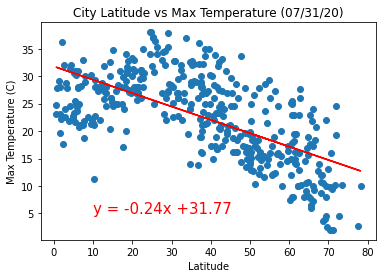

In [15]:
nt_lat_values = northern_cities_df['Lat']
nt_temp_values = northern_cities_df['Max Temp']
correlation = st.pearsonr(nt_lat_values, nt_temp_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(nt_lat_values, nt_temp_values)
regress_values = nt_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(nt_lat_values, nt_temp_values)
plt.plot(nt_lat_values, regress_values, "r-")
plt.annotate(line_eq, (10,5), fontsize = 15, color = 'red')
plt.title('City Latitude vs Max Temperature (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.69


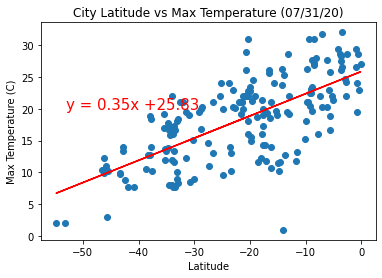

In [16]:
st_lat_values = southern_cities_df['Lat']
st_temp_values = southern_cities_df['Max Temp']
correlation = st.pearsonr(st_lat_values, st_temp_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(st_lat_values, st_temp_values)
regress_values = st_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(st_lat_values, st_temp_values)
plt.plot(st_lat_values, regress_values, "r-")
plt.annotate(line_eq, (-53,20), fontsize = 15, color = 'red')
plt.title('City Latitude vs Max Temperature (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.03


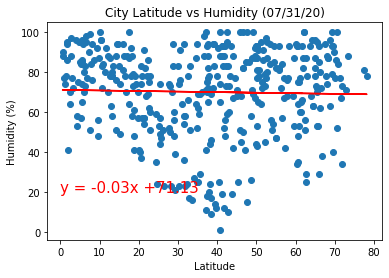

In [17]:
nt_lat_values = northern_cities_df['Lat']
nt_humd_values = northern_cities_df['Humidity']
correlation = st.pearsonr(nt_lat_values, nt_humd_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(nt_lat_values, nt_humd_values)
regress_values = nt_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(nt_lat_values, nt_humd_values)
plt.plot(nt_lat_values, regress_values, "r-")
plt.annotate(line_eq, (0,20), fontsize = 15, color = 'red')
plt.title('City Latitude vs Humidity (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.07


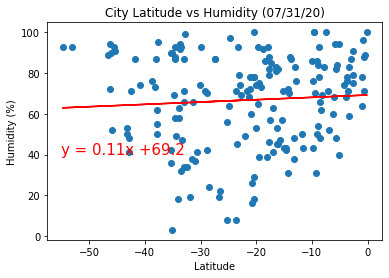

In [18]:
st_lat_values = southern_cities_df['Lat']
st_humd_values = southern_cities_df['Humidity']
correlation = st.pearsonr(st_lat_values, st_humd_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(st_lat_values, st_humd_values)
regress_values = st_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(st_lat_values, st_humd_values)
plt.plot(st_lat_values, regress_values, "r-")
plt.annotate(line_eq, (-55,40), fontsize = 15, color = 'red')
plt.title('City Latitude vs Humidity (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.03


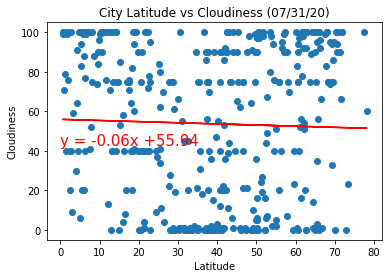

In [19]:
nt_lat_values = northern_cities_df['Lat']
nt_clou_values = northern_cities_df['Cloudiness']
correlation = st.pearsonr(nt_lat_values, nt_clou_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(nt_lat_values, nt_clou_values)
regress_values = nt_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(nt_lat_values, nt_clou_values)
plt.plot(nt_lat_values, regress_values, "r-")
plt.annotate(line_eq, (0,43), fontsize = 15, color = 'red')
plt.title('City Latitude vs Cloudiness (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.09


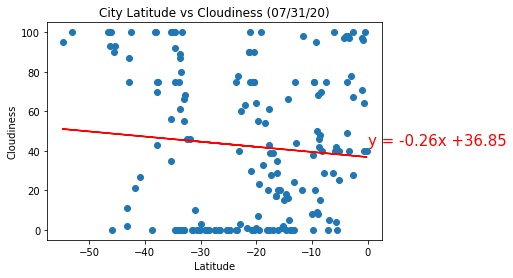

In [20]:
st_lat_values = southern_cities_df['Lat']
st_clou_values = southern_cities_df['Cloudiness']
correlation = st.pearsonr(st_lat_values, st_clou_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(st_lat_values, st_clou_values)
regress_values = st_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(st_lat_values, st_clou_values)
plt.plot(st_lat_values, regress_values, "r-")
plt.annotate(line_eq, (0,43), fontsize = 15, color = 'red')
plt.title('City Latitude vs Cloudiness (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.01


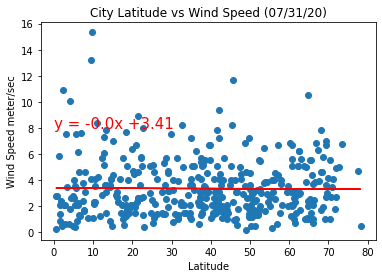

In [21]:
nt_lat_values = northern_cities_df['Lat']
nt_wind_values = northern_cities_df['Wind Speed']
correlation = st.pearsonr(nt_lat_values, nt_wind_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(nt_lat_values, nt_wind_values)
regress_values = nt_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(nt_lat_values, nt_wind_values)
plt.plot(nt_lat_values, regress_values, "r-")
plt.annotate(line_eq, (0,8), fontsize = 15, color = 'red')
plt.title('City Latitude vs Wind Speed (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed meter/sec')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.01


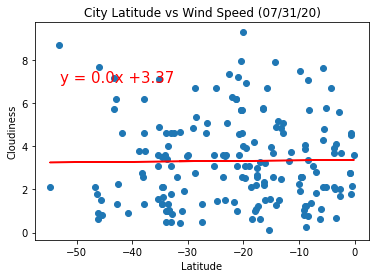

In [22]:
st_lat_values = southern_cities_df['Lat']
st_wind_values = southern_cities_df['Wind Speed']
correlation = st.pearsonr(st_lat_values, st_wind_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(st_lat_values, st_wind_values)
regress_values = st_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(st_lat_values, st_wind_values)
plt.plot(st_lat_values, regress_values, "r-")
plt.annotate(line_eq, (-53,7), fontsize = 15, color = 'red')
plt.title('City Latitude vs Wind Speed (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()